# Curs 6: Regresia liniara, evaluarea si selectarea naiva a modelelor

Prin regresie se doreste estimarea unei valori continue: temperatura sau presiunea dintr-un proces fizic, valoarea estimata pentru un serviciu/bun cumparat etc. Prin comparatie, clasificarea dorea estimarea unei valori de iesire dintr-o multime finita de posibilitati (clase).

## Regresia liniara

### Exemplu de problema

Sa presupunem ca dorim sa modelam pretul de vanzare al unei proprietati imobiliare, *e.g.* o casă. Se cunosc $p$ cazuri de vanazare-cumparare de case. Fiecare casa vanduta este descrisa printr-un set de trasaturi (eng: features) cum ar fi: suprafata (sau numarul de camere), distanta de la ea pana la centrul orasului, gradul de poluare a zonei etc. - toate valori numerice. De asemenea, pentru fiecare casa se cunoaste care a fost pretul de vanzare-cumparare. Un astfel de set de date este [Boston housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). 

Se doreste a se construi un model care, plecand de la datele furnizate, sa fie capabil sa "invete" sa aproximeze valoarea unei noi proprietati pentru care valorile de intrare (trasaturile) se cunosc.

Avem de-a face cu:
* problema de instruire supervizata (se cunosc asocieri intre trasaturi de intrare - valoare de iesire);
* problema de regresie - valoarea estimata este una continua, nu dintr-o multime predefinita de clase. 

### Regresia liniara

Se poate consulta Cursul 2 din [Sisteme computationale inteligente, note de curs](https://github.com/lmsasu/cursuri/blob/master/SistemeComputationaleInteligente/SistemeComputationaleInteligente.pdf), pentru expunere mai ampla, algoritm de instruire bazat pe cautare dupa directia gradientului (stochastic gradient descent) si metoda ecuatiilor normale. O scurta descriere este data mai jos. 

Notatii:
* $x_1, x_2, \dots, x_n$: valorile numerice aferente unei case: suprafata, distanta pana la centrul orasului etc. 
* $\theta_0, \theta_1, \dots, \theta_n$ sunt coeficienti care trebuie determinati. Se observa ca avem cu un coeficient mai mult decat valori de trasaturi. 

In regresia liniara se presupune ca valoarea de iesire (pretul) variaza liniar cu valorile trasaturilor de intrare. Se noteaza un astfel de model cu $h$; dependenta lui de un vector de coeficienti - numit si vectori de ponderi (eng: weights) - se marcheaza explicit prin notatia $h_\theta$. Forma modelului este:
$$
h_{\theta}(\mathbf{x}) = \theta_0 + \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \dots +\theta_n \cdot x_n
$$
Primul termen al expresiei de dupa egal se poate scrie sub forma: $\theta_0 \cdot 1$. Daca notam cu $x_0$ valoarea constanta 1, asta ne permite sa consideram doi vectori cu $n+1$ componente:
* $\mathbf{x} = \begin{pmatrix}
x_0 \\
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
$ este vectorul de intrare continand caracteristicile numerice ale unei case oarecare;
* $\boldsymbol{\theta} = \begin{pmatrix}
\theta_0 \\
\theta_1 \\
\vdots \\
\theta_n
\end{pmatrix}
$ este vectorul de coeficienti.

Relatia de mai sus pentru $h_{\theta}$ se scrie mai concis astfel:
$$
    h_\theta(\mathbf{x}) =  \boldsymbol{\theta}^t \cdot \mathbf{x} 
$$
care, desigur, in NumPy se scrie cu 
```python
np.dot(theta, x)
```

Ceea ce trebuie facut este determinarea coeficientilor din vectorul $\boldsymbol{\theta}$ pentru care valoarea medie a patratelor diferentelor dintre estimarea facuta de model pentru valoarea de vanzare a unei case si valoarea ei cunoscuta sa fie cat mai mica:
$$
J(\boldsymbol{\theta}) = \frac{1}{2p} \sum\limits_{i=1}^p \left( h_{\theta}(\mathbf{x}_i) - y_i \right)^2
$$
unde: $p$ este numarul de cazuri de vanzare cunoscute, $\mathbf{x}_i$ este vectorul de trasaturi pentru casa $i$, $y_i$ este suma cu care s-a vandut aceasta casa. 

Modelul rezultat este simplu, popular, interpretabil. Poate fi insa prea simplist pentru destul de multe cazuri.  

Sunt doua variante de determinarea a acelui vector de coeficienti $\boldsymbol{\theta}$ care face ca valoarea functiei de eroare sa fie minima. Cititorul poate consulta cursul indicat la inceputul sectiunii. Noi vom folosi implementari din biblioteca scikit learn. 

### Setul de date

Setul de date este [Boston housing](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/): "Concerns housing values in suburbs of Boston", cu 506 instante (case vandute), 13 trasaturi de intrare. Toate valorile sunt precizate. Descrierea setului de date se gaseste [aici](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

### Citirea datelor

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn

print(f'Pandas version: {pd.__version__}')
print(f'sklearn version: {sklearn.__version__}')
print(f'numpy version: {np.__version__}')

# Pandas version: 1.0.3
# sklearn version: 0.22.1
# numpy version: 1.18.1

Pandas version: 1.0.3
sklearn version: 0.22.1
numpy version: 1.18.1


In [2]:
# url_housing = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
url_housing = './data/housing.data'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
#citire date, delimitator regex
data_house = pd.read_csv(url_housing, names=names, delimiter=r'\s+')

In [4]:
data_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
data_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Impartirea setului de date in set de antrenare si set de testare

Ca si in cazul problemelor de clasificare, o parte din date vor fi folosite pentru antrenare, iar modelul rezultat va fi testat pe restul de date - setul de testare. 

In [6]:
#separare X si y
X = data_house.values[:, :-1]
y = data_house.values[:, -1]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

### Reprezentare de valori

Text(0, 0.5, 'Median value of owner-occupied homes in $1000s')

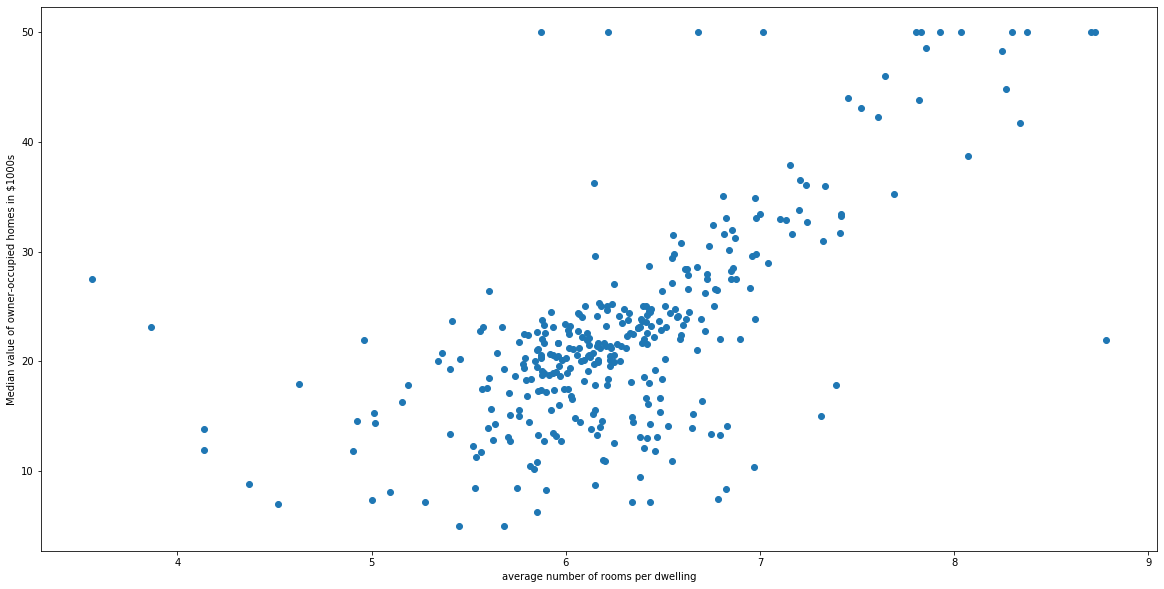

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

plt.scatter(X_train[:, 5], y_train)
plt.xlabel('average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000''s')

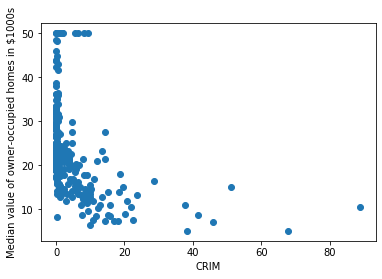

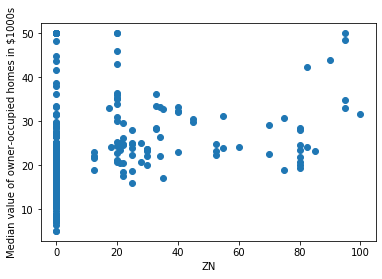

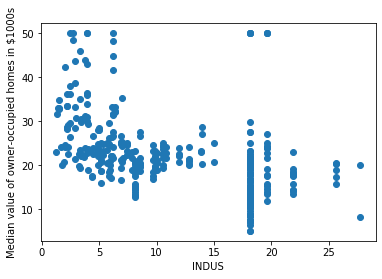

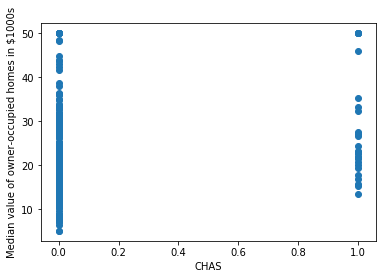

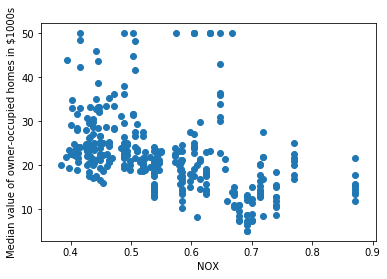

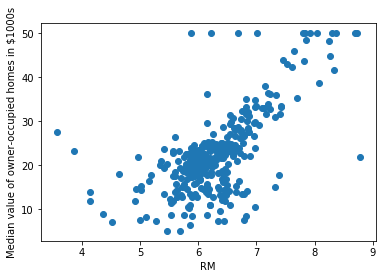

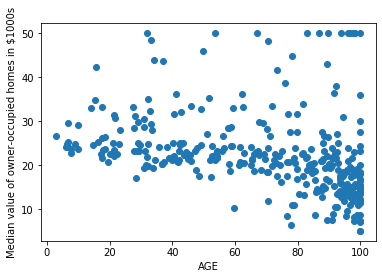

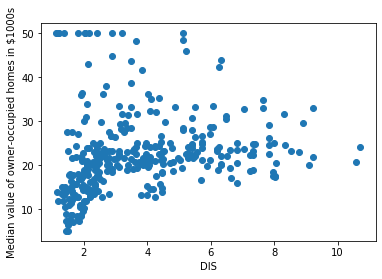

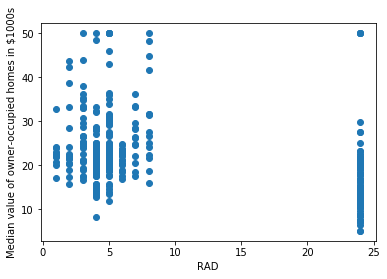

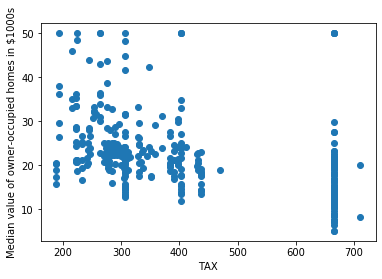

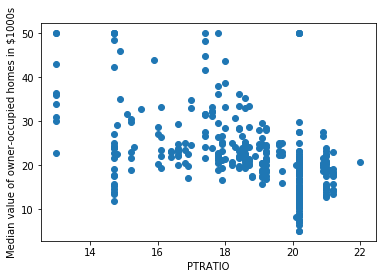

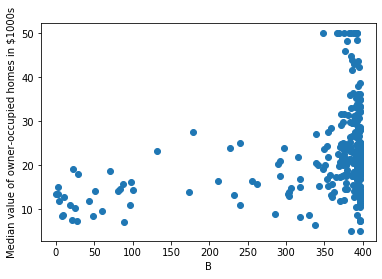

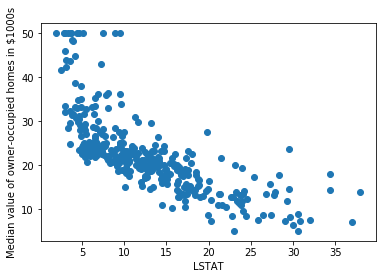

In [9]:
for index, name in enumerate(names[:-1]):
    plt.scatter(X_train[:, index], y_train)
    plt.xlabel(name)
    plt.ylabel('Median value of owner-occupied homes in $1000''s')
    plt.show()

### Construirea modelului

In [10]:
#instantiere model, antrenare
model = LinearRegression(normalize=False)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#tiparirea coeficientilor rezultati
print(list(zip(model.coef_, names)))
print(f'Termenul liber: {model.intercept_}')

[(-0.10945163239567468, 'CRIM'), (0.03956292401197034, 'ZN'), (-0.03104699417005668, 'INDUS'), (3.4154408057358894, 'CHAS'), (-18.565960257020993, 'NOX'), (3.4805027334070204, 'RM'), (0.0034558841248936148, 'AGE'), (-1.6185683860170852, 'DIS'), (0.22026449338476467, 'RAD'), (-0.00807267196166425, 'TAX'), (-0.8767630791999557, 'PTRATIO'), (0.008922826386680903, 'B'), (-0.5381297405142974, 'LSTAT')]
Termenul liber: 37.82027046440504


In [12]:
#predictie pe setul de test
y_hat = model.predict(X_test)

In [13]:
#afisarea primelor trei predictii
print(y[0:3])
print(y_hat[0:3])

[24.  21.6 34.7]
[21.77519423 25.02811454 32.2202671 ]


### Calculare metricilor de eroare

Ne intereseaza cat de deparrate sunt valorile prezise de cele actuale. Aceasta se face pe baza unor metrici de eroare. Sunt mai multe metrici care se pot considera pentru o problema de regresie:
1. Mean absolute error (MAE):
$$
MAE = \frac{1}{p}\sum\limits_{i=1}^p \left|y_i - \hat{y}_i\right|
$$
unde $p$ e numarul de cazuri peste care modelul a produs estimari - de exemplu, numarul de cazuri din setul de testare.
1. Root mean squared error (RMSE):
$$
RMSE = \sqrt{\frac{1}{p} \sum\limits_{i=1}^p (y_i - \hat{y}_i)^2}
$$
1. Intrucat functia radical este crescatoare, se prefera uneori a se renunta la radical, obtinand Mean squared error (MSE):
$$
MSE = \frac{1}{p} \sum\limits_{i=1}^p (y_i - \hat{y}_i)^2
$$

In sklearn exista modulul `sklearn.metrics` care contine functii si clase dedicate calculului metricilor de eroare. 

In [14]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
print('mae={0}, mse={1}'.format(mae, mse))

mae=3.142062705902121, mse=20.36300736104019


Putem incerca cu diferite subsetui de trasaturi. De exemplu, atributul CHAS este descris in documentatie ca 'Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)'. Putem incerca sa vedem cum functioneaza modelul de regresie fara el:

In [15]:
names_woCHAS = [item for item in names if item != 'CHAS']

data_house_noCHAS = data_house[names_woCHAS]
data_house_noCHAS.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [29]:
X_noCHAS = data_house_noCHAS.values[:, :-1]
y_noCHAS = data_house_noCHAS.values[:, -1]

X_train_noCHAS, X_test_noCHAS, y_train_noCHAS, y_test_noCHAS = train_test_split(X_noCHAS, y_noCHAS, test_size=0.34, random_state=1)

#instantiere model, antrenare
model = LinearRegression(normalize=False)
model.fit(X_train_noCHAS, y_train_noCHAS)

#predictie pe setul de test
y_hat = model.predict(X_test_noCHAS)

mae = metrics.mean_absolute_error(y_test_noCHAS, y_hat)
mse = metrics.mean_squared_error(y_test_noCHAS, y_hat)
rmse = np.sqrt(mse)
print('mae={0}, mse={1}'.format(mae, mse))

# se remarca o usoara inrautatire a ambelor scoruri. 

mae=3.3966281723732448, mse=20.260753763136357


### Model liniar cu regularizare L1, L2

Regularizarea are ca scop reducerea in valoare absoluta a coeficientilor $\theta_1, \theta_2, \dots, \theta_n$ (se remarca absenta termenului liber din multimea coeficientilor regularizati). Daca coeficientii sunt mari in valoare absoluta, atunci variatii mici ale valorilor de intrare duc la variatii mari ale iesirii, ceea ce corespunde unui sistem instabil.

Functia de cost se modifica astfel:
$$
J(\boldsymbol{\theta}) = \frac{1}{2p} \sum\limits_{i=1}^p \left( h_{\theta}(\mathbf{x}_i) - y_i \right)^2 + \lambda \cdot \sum\limits_{j=1}^{n} \theta_j^2
$$

Implementarea in `sklearn` este continuta in biblioteca `sklearn.linear_model` in clasa `Ridge`. 

Exista si varianta in care termenul de regularizare se bazeaza pe valorile absolute ale coeficientilor:
$$
J(\boldsymbol{\theta}) = \frac{1}{2p} \sum\limits_{i=1}^p \left( h_{\theta}(\mathbf{x}_i) - y_i \right)^2 + \lambda \cdot \sum\limits_{j=1}^{n} \left|\theta_j\right|
$$
Modelul corespunzator se numeste Lasso (Least Absolute Shrinkage and Selection Operator), iar implementarea se afla in clasa `Lasso` din acelasi pachet. 

In [17]:
model = Ridge(alpha=0.1)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)

print("mae={0}, mse={1}".format(mae, mse))

mae=3.134241487557219, mse=20.339902097538854


In [18]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
y_hat = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_hat)
mse = metrics.mean_squared_error(y_test, y_hat)

print("mae={0}, mse={1}".format(mae, mse))

mae=3.139964596651777, mse=20.35461571839044


## 5.2. Evaluarea modelelor 

### K-fold cross validation

Evaluarea calitatii unui model se poate face pe:
1. setul de antrenare - dar acest stil de lucru tinde sa favorizeze aparitia unor modele complexe, care invata bine setul de antrenare, dar nu generalizeaza bine in afara lui (overfitting)
1. un set de testare separat fata de setul de antrenare - o idee mai buna, care tinde sa incurajeze modelele care se comporta bine si pe altceva decat setul de antrnare; overfitting-ul este redus ca incidenta; totusi, exista o problema: rezultatul evaluarii depinde de o unica masuratoare - pe unicul set de date de testare, deci poate fi prea optimista sau prea pesimista;
1. mai multe seturi de testare; in particular, putem cere impartirea unui set de testare in $k$ subseturi de dimensiuni (cat mai) egale; pe rand, fiecare din cele $k$ seturi este folosit drept set de testare, iar celelalte $k-1$ subseturi sunt pentru antrenarea modelului La final se face media celor $k$ scoruri, determinand un scor mediu, mai apropiat de realitate. varianta descrisa se numeste k-fold cross validation si este reprezentata mai jos pentru $k=10$:
![k fold cross validation](./images/k-fold-diagram.png)

### Exemplificare: k-fold cross validation pentru un model de clasificare

Vom folosi pentru exemplificare k-NN; nu exista nicio legatura intre $k$ -- numarul de vecini si $k$ - numarul de fold-uri considerat, cele doua folosind intamplator aceeasi litera pentru a denota un hiperparametru al modelului, respectiv numarul de partitii ale setului de antrenare. 

In primul pas vom demonstra variabilitatea rezultatelor instruirii.

In [19]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [20]:
iris = load_iris()
X = iris.data
y = iris.target

In [21]:
#iterare peste 5 partitionari aleatoare
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=i)
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_test)
    print('Acuratete:', metrics.accuracy_score(y_test, y_predicted))

Acuratete: 0.98
Acuratete: 0.98
Acuratete: 1.0
Acuratete: 0.94
Acuratete: 0.98


Putem face o medie a numerelor rezultate si aceasta valoare este o estimare mai realista a performantei clasificatorului. Prin k-fold cross validation, insa, se are in vedere ca fiecare inregistrare din setul initial sa fie folosit pentru testare, in mod garantat. De asemenea, fiecare inregistrare se foloseste pentru antrenare. 

In [22]:
from sklearn.model_selection import cross_val_score

In [23]:
model = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
0.9666666666666668


Desigur, nimic nu ne opreste sa repetam k-fold cross validation pentru diferite permutari initiale ale setului de antrenare si sa calculam la final media rezultatelor (media mediilor). Estimarea este mai robusta, dar mare consumatoare de timp. 

### Raportarea rezultatelor de pe setul de antrenare

Este posibila sa se ceara raportarea rezultatelor pentru fold-urile care au fost folosite la antrenare. Acest demers este util pentru cazurile in care se suspecteaza overfit: rezultatele de pe setul de antrenare sunt excelente, dar cele de pe setul de testare sunt mult mai proaste. 

De asemenea, se poate inregistra timpul cerut de procesul de antrenare

Raportarea rezultatelor se face cu functia `cross_validate` din modulul `sklearn.model_selection`:

In [24]:
from sklearn.model_selection import cross_validate

model = KNeighborsClassifier(n_neighbors=5)
results = cross_validate(model, X, y, cv=3, scoring='accuracy', return_train_score=True)
print(results)


{'fit_time': array([0.00099826, 0.0009973 , 0.00099778]), 'score_time': array([0.00398874, 0.00199914, 0.00199485]), 'test_score': array([0.98, 0.98, 0.98]), 'train_score': array([0.96, 0.97, 0.98])}


## Selectarea manuala a modelului

Valorea hiperparametrului $k$ a fost aleasa mai sus in mod arbitrar. Se pune problema: care este cea mai buna valoare a lui $k$? Putem face acest lucru printr-o cautare sistematica a lui $k$, de exemplu $k \in \{ 1, 2, \dots, 20 \}$:

Max score obtained for: 13 with value: 0.9800000000000001


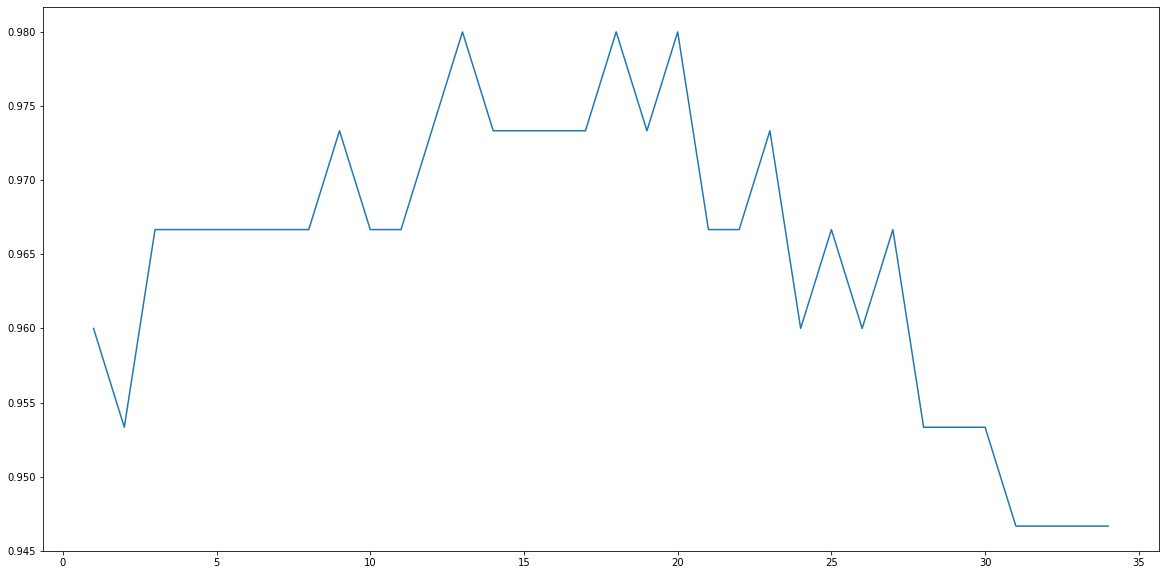

In [25]:
def mean_score_for_model(k:int) -> float:
    """Creates and train a KNeighborclassifier with number of neighbors given by :param k:
    :param k: number of neighbors
    :return: mean of scores over 10 fold CV
    """
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    return scores.mean()

range_k = range(1, 35)
scores_k = [mean_score_for_model(k) for k in range_k]

print('Max score obtained for: {0} with value: {1}'.format(1+np.argmax(scores_k), np.max(scores_k)))

plt.figure(figsize=(20, 10))
plt.plot(range_k, scores_k);

Se va arata care este suportul din framework-ul sklearn pentru cautarea de hiperparametri - cautare pentru combinatii de valori, cautare aleatoare, paralelizarea cautarii.

## Impartirea setului de date in mod stratificat

Atunci cand se face impartirea pe setul de date, este bine sa ne asiguram ca subsetul de antrenare si cel de testare contin aceeasi proportie intre clasele din submultimile de antrenare si de testare. 

**Exemplu:** pentru setul de date iris, numarul de cazuri din fiecare clasa este egal (50). Dorim ca pentru fiecare subset (de antrnare si de testare) sa avem ca numarul de cazuri pentru fiecare clasa de floare de iris sa fie aproximativ acelasi. Asta ne permite sa evitam o situatie in care subsetul de antrenare are doar flori de doua clase iar subsetul de testare doar flori din a treia clasa. Pentru asta se foloseste stratified sampling - esantionare stratificata.

Pentru sklearn functia care realizeaza impartirea stratificata in fold-uri este [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) - ca si inainte - cu parametrul suplimentar `stratify`: "If not None, data is split in a stratified fashion, using this as the class labels."

In [26]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y)


In [27]:
from collections import Counter
print(f'Numarare de elemente in setul de antrenare: {Counter(y_train)}')
print(f'Numarare de elemente in setul de testare: {Counter(y_test)}')

Numarare de elemente in setul de antrenare: Counter({1: 34, 0: 33, 2: 33})
Numarare de elemente in setul de testare: Counter({2: 17, 0: 17, 1: 16})


Acest lucru trebuie considerat, desigur, si la partea de cross-validation: se va prefera un stratified cross validatin pentru probleme de testare.